Exploratory Data Analysis on the Amazon Review Dataset
=====================================================

This notebook is an exploratory data analysis on the Amazon Review dataset. The dataset contains reviews of products from Amazon. The graph is available on [Github](https://github.com/joanlafuente/Graph-Anomaly-Detection/tree/main/Data)

In [2]:
import pickle

# Load the graph data from the provided pickle file
with open('/home/ndelafuente/Documents/SYNTHESIS_PROJECT/Graph-Anomaly-Detection/amz_homo_adjlists.pickle', 'rb') as file:
    graph = pickle.load(file)

# Display basic information about the graph
print(f"The Amazon Review dataset is turned to a graph of the following type: {type(graph)}, which contains {len(graph)} nodes.")  # Show the type of the graph object and the number of elements (nodes or edges)


The Amazon Review dataset is turned to a graph of the following type: <class 'collections.defaultdict'>, which contains 11944 nodes.


In [6]:
import networkx as nx
#If the graph is of type collections.defaultdict, turn it into networkx format
# Convert the graph to NetworkX format
nx_graph = nx.Graph(graph)

#Check format
print("format of the graph:", type(nx_graph))

format of the graph: <class 'networkx.classes.graph.Graph'>


In [8]:

print(f"Number of nodes: {nx_graph.number_of_nodes()}")
print(f"Number of edges: {nx_graph.number_of_edges()}")


Number of nodes: 11944
Number of edges: 4410336


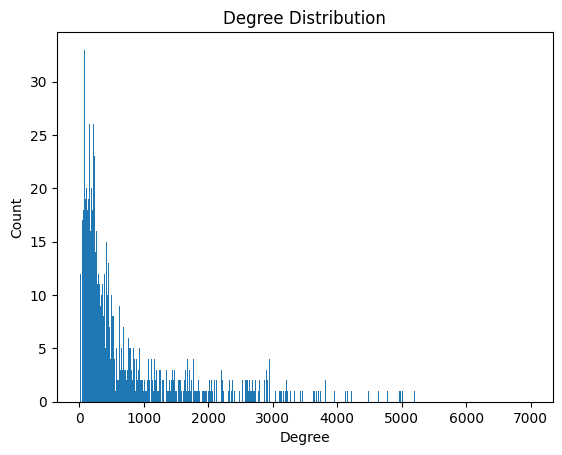

In [9]:
#Compute main statistics of the graph and plot it
import matplotlib.pyplot as plt

# Compute main statistics of the graph
degree_sequence = sorted([d for n, d in nx_graph.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# Plot the degree distribution
plt.bar(degree_count.keys(), degree_count.values())
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()


In [10]:
#Compute more interesting statistics and properties of the graph

# Compute the average degree of the graph
average_degree = sum(degree_sequence) / nx_graph.number_of_nodes()
print(f"Average degree: {average_degree}")

# Compute the clustering coefficient of the graph
clustering_coefficient = nx.average_clustering(nx_graph)
print(f"Clustering coefficient: {clustering_coefficient}")

# Compute the diameter of the graph
diameter = nx.diameter(nx_graph)
print(f"Diameter: {diameter}")

# Compute the average shortest path length of the graph
average_shortest_path_length = nx.average_shortest_path_length(nx_graph)
print(f"Average shortest path length: {average_shortest_path_length}")

# Compute the number of connected components in the graph
number_connected_components = nx.number_connected_components(nx_graph)
print(f"Number of connected components: {number_connected_components}")

# Compute the size of the largest connected component in the graph
largest_connected_component = max(nx.connected_components(nx_graph), key=len)
size_largest_connected_component = len(largest_connected_component)
print(f"Size of the largest connected component: {size_largest_connected_component}")

# Compute the number of triangles in the graph
number_triangles = sum(nx.triangles(nx_graph).values()) / 3
print(f"Number of triangles: {number_triangles}")

# Compute the number of triangles in the largest connected component of the graph
number_triangles_largest_connected_component = sum(nx.triangles(nx_graph, node) for node in largest_connected_component) / 3
print(f"Number of triangles in the largest connected component: {number_triangles_largest_connected_component}")



Average degree: 738.5023442732753


In [ ]:
#Plot the graph

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw(nx_graph, node_size=10)
plt.show()
